In [115]:
# Chapter 9

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT

SyntaxError: invalid syntax (3252753489.py, line 3)

In [116]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")

In [117]:
import numpy as np

import random

import thinkstats2
import thinkplot

In [118]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

In [119]:
import first

live, firsts, others = first.MakeFrames()
data = firsts.prglngth.values, others.prglngth.values

In [120]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data

In [121]:
class CorrelationPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [122]:
class PregLengthTest(thinkstats2.HypothesisTest):

    def MakeModel(self):
        firsts, others = self.data
        self.n = len(firsts)
        self.pool = np.hstack((firsts, others))

        pmf = thinkstats2.Pmf(self.pool)
        self.values = range(35, 44)
        self.expected_probs = np.array(pmf.Probs(self.values))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
    
    def TestStatistic(self, data):
        firsts, others = data
        stat = self.ChiSquared(firsts) + self.ChiSquared(others)
        return stat

    def ChiSquared(self, lengths):
        hist = thinkstats2.Hist(lengths)
        observed = np.array(hist.Freqs(self.values))
        expected = self.expected_probs * len(lengths)
        stat = sum((observed - expected)**2 / expected)
        return stat

In [123]:
def ReadFemResp(dct_file='2002FemResp.dct',
                dat_file='2002FemResp.dat.gz',
                nrows=None):
    CleanFemResp(dct)
    return df

In [124]:
**Exercise 9.1:** As sample size increases, the power of a hypothesis test increases, which means it is more likely to be positive if the effect is real. Conversely, as sample size decreases, the test is less likely to be positive even if the effect is real.

To investigate this behavior, run the tests in this chapter with different subsets of the NSFG data. You can use `thinkstats2.SampleRows` to select a random subset of the rows in a DataFrame.

What happens to the p-values of these tests as sample size decreases? What is the smallest sample size that yields a positive test?

SyntaxError: invalid syntax (180865169.py, line 1)

In [ ]:
def AllTests(live):
    n = len(live)
    data = firsts.prglngth.values, others.prglngth.values
    ht = DiffMeansPermute(data)
    data = (firsts.totalwgt_lb.dropna().values,
        others.totalwgt_lb.dropna().values)
    ht = DiffMeansPermute(data)
    pval2 = ht.PValue
     # correlation
    live2 = live.dropna(subset=['agepreg', 'totalwgt_lb'])
    data = live2.agepreg.values, live2.totalwgt_lb.values
    ht = CorrelationPermute(data)
    pval1 = ht.PValue
     # compare lengths chi-squared
    data = firsts.prglngth.values, others.prglngth.values
    ht = PregLengthTest(data)
    pval = ht.PValue

In [ ]:
print(pval2, pval1, pval)

In [125]:
n = len(live)
sample = thinkstats2.SampleRows(live, n)
AllTests(sample)
n //= 2

In [126]:
# Chapter 10

Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


SyntaxError: invalid syntax (1924631822.py, line 3)

In [127]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download(
    "https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

In [128]:
from thinkstats2 import Mean, MeanVar, Var, Std, Cov

def LeastSquares(xs, ys):
    meanx, varx = MeanVar(xs)
    meany = Mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope

In [129]:
def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

In [130]:
def SampleRows(df, nrows, replace=False):
    """Choose a sample of rows from a DataFrame.

    df: DataFrame
    nrows: number of rows
    replace: whether to sample with replacement

    returns: DataDf
    """
    indices = np.random.choice(df.index, nrows, replace=replace)
    sample = df.loc[indices]
    return sample

def ResampleRows(df):
    """Resamples rows from a DataFrame.

    df: DataFrame

    returns: DataFrame
    """
    return SampleRows(df, len(df), replace=True)

In [131]:
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

In [132]:
def PlotPercentiles(age_means, cdfs):
    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weight_percentiles = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(age_means, weight_percentiles, label=label)

In [133]:
def Summarize(estimates, actual=None):
    mean = Mean(estimates)
    stderr = Std(estimates, mu=actual)
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.ConfidenceInterval(90)
    print('mean, SE, CI', mean, stderr, ci)

In [134]:
def PlotConfidenceIntervals(xs, inters, slopes, percent=90, **options):
    fys_seq = []
    for inter, slope in zip(inters, slopes):
        fxs, fys = FitLine(xs, inter, slope)
        fys_seq.append(fys)

    p = (100 - percent) / 2
    percents = p, 100 - p
    low, high = thinkstats2.PercentileRows(fys_seq, percents)
    thinkplot.FillBetween(fxs, low, high, **options)

In [135]:
class SlopeTest(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        ages, weights = data
        _, slope = thinkstats2.LeastSquares(ages, weights)
        return slope

    def MakeModel(self):
        _, weights = self.data
        self.ybar = weights.mean()
        self.res = weights - self.ybar

    def RunModel(self):
        ages, _ = self.data
        weights = self.ybar + np.random.permutation(self.res)
        return ages, weights

In [136]:
def ResampleRowsWeighted(df, column='finalwgt'):
    weights = df[column]
    cdf = thinkstats2.Cdf(dict(weights))
    indices = cdf.Sample(len(weights))
    sample = df.loc[indices]
    return sample

In [137]:
def SamplingDistributions(live, iters=101):
    t = []
    for _ in range(iters):
        sample = ResampleRows(live)
        ages = sample.agepreg
        weights = sample.totalwgt_lb
        estimates = LeastSquares(ages, weights)
        t.append(estimates)

    inters, slopes = zip(*t)
    return inters, slopes

In [138]:
# Exercise 10.1

**Exercise:** Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height?

Like the NSFG, the BRFSS oversamples some groups and provides a sampling weight for each respondent. In the BRFSS data, the variable name for these weights is totalwt. Use resampling, with and without weights, to estimate the mean height of respondents in the BRFSS, the standard error of the mean, and a 90% confidence interval. How much does correct weighting affect the estimates?

Object `height` not found.


In [139]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/brfss.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/CDBRFS08.ASC.gz")

In [140]:
import brfss

df = brfss.ReadBrfss(nrows=None)
df = df.dropna(subset=['htm3', 'wtkg2'])
heights, weights = df.htm3, df.wtkg2
log_weights = np.log10(weights)

In [141]:
# Estimate intercept and slope.

thinkstats2.LeastSquares(heights, log_weights)

(0.9930804163917826, 0.005281454169417984)

NameError: name 'fxs' is not defined

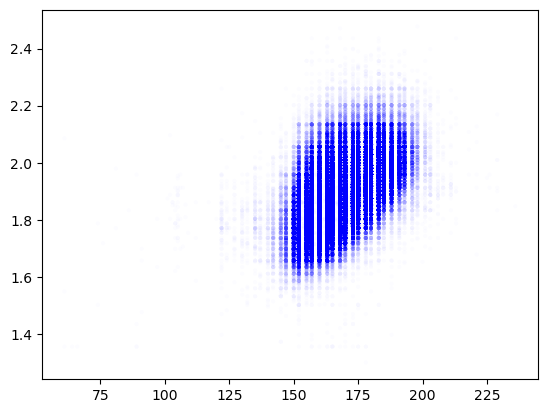

In [142]:
# Make a scatter plot of the data and show the fitted line.

thinkplot.Scatter(heights, log_weights, alpha=0.01, s=10)
thinkplot.Plot(fxs, fys, color='red', linewidth=4)
thinkplot.Config(xlabel='Height (cm)', ylabel='log10 weight (kg)')

In [ ]:
# Make the same plot but apply the inverse transform to show weights on a linear (not log) scale.

thinkplot.Scatter(heights, log_weights, alpha=0.01, s=10)
thinkplot.Plot(fxs, 10**fys, color='red', linewidth=4)
thinkplot.Config(xlabel='Height (cm)', ylabel='log10 weight (kg)')

In [ ]:
# Plot percentiles of the residuals.

PlotPercentiles(heights, log_weights)
thinkplot.Config(xlabel='height (cm)', ylabel='residual weight (kg)', legend=False)

In [ ]:
# Compute correlation.

cor = thinkstats2.Corr(heights, log_weights)
cor

In [ ]:
# Compute coefficient of determination.

thinkstats2.CoefDetermination(log_weights, heights)

In [ ]:
# Confirm that $R^2 = \rho^2$.

np.isclose(cor**2, r2)

In [ ]:
# Compute Std(ys), which is the RMSE of predictions that don't use height.

stdys = thinkstats2.Std(log_weights)
stdys

In [ ]:
# Compute Std(res), the RMSE of predictions that do use height.

stdres = thinkstats2.Std(res)
stdres

In [ ]:
# How much does height information reduce RMSE?

1 - stdres / stdys

In [ ]:
# Use resampling to compute sampling distributions for inter and slope.

sample = thinkstats2.ResampleRows(df)
estimates = thinkstats2.LeastSquares(sample.htm3, np.log10(sample.wtkg2))
inters, slopes

In [ ]:
# Plot the sampling distribution of slope.

cdf = thinkstats2.Cdf(slopes)
thinkplot.Cdf(cdf)

In [ ]:
# Compute the p-value of the slope.

cdf[0]

In [ ]:
# Compute the 90% confidence interval of slope.

cdf.Percentile(5), cdf.Percentile(95)

In [144]:
# Compute the mean of the sampling distribution.

mean = thinkstats2.Mean(slopes)
mean

NameError: name 'slopes' is not defined

In [ ]:
# Compute the standard deviation of the sampling distribution, which is the standard error.

thinkstats2.Std(slopes)

In [ ]:
# Resample rows without weights, compute mean height, and summarize results.
# Resample rows with weights.  Note that the weight column in this dataset is called `finalwt`.

estimateunweighted = [thinkstats2.ResampleRows(df).htm3.mean()]
Summarize(estimateunweighted)

estimateweighted = [ResampleRowsWeighted(df, 'finalwt').htm3.mean()]
Summarize(estimateweighted)